In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [318]:

#g_score = pd.read_csv('C:/Users/saleh/Desktop/SM/data movielens/ml-25m/genome-scores.csv')
#g_tags = pd.read_csv('C:/Users/saleh/Desktop/SM/data movielens/ml-25m/genome-tags.csv')
links = pd.read_csv('C:/Users/saleh/Desktop/SM/Data/1M/ml-latest-small/links.csv')
movies = pd.read_csv('C:/Users/saleh/Desktop/SM/Data/1M/ml-latest-small/movies.csv')
ratings = pd.read_csv('C:/Users/saleh/Desktop/SM/Data/1M/ml-latest-small/ratings.csv')
#tags = pd.read_csv('C:/Users/saleh/Desktop/SM/data movielens/ml-25m/tags.csv')

imdb_ratings = pd.read_csv('C:/Users/saleh/Desktop/SM/title.ratings.tsv.gz',sep='\t')
imdb_ratings['imdbId'] = pd.to_numeric(imdb_ratings['tconst'].str[2:])

In [319]:
print('Number of Movies in MovieLens Data: {0}'.format(movies['title'].nunique()))
print('Number of Users in MovieLens Data: {0}'.format(ratings['userId'].nunique()))
print('Number of Movies in IMDB Data: {0}'.format(imdb_ratings['tconst'].nunique()))

Number of Movies in MovieLens Data: 9737
Number of Users in MovieLens Data: 610
Number of Movies in IMDB Data: 1024884


In [240]:
#Extract year from movie title

if 'genres' not in movies.columns:
    movies = pd.read_csv('C:/Users/saleh/Desktop/SM/Data/1M/ml-latest-small/movies.csv')

if 'release_year' not in movies.columns:
    movies['release_year'] = movies['title'].str.rstrip().str[-5:-1]

movies.loc[movies['release_year'].str.isdigit() == False, ['release_year']] = ''
movies['release_year'] = pd.to_numeric(movies['release_year'])


    
# Perform one-hot encoding for genres and then drop the "no genres listed column"
d = pd.get_dummies(movies.genres)

cols = [c for c in d.columns if '|' not in c]

#print('Unique Genres: {0} {1}'.format(len(cols),cols))

for genre in cols:
    movies[genre] = movies['genres'].str.contains(genre).astype(int)

movies.head(15)#['title'].str.rstrip().str[-5:-1]

C:\Users\saleh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,movieId,title,genres,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,1995.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),Comedy|Romance,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,1995.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,1995.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
movies.release_year.unique()

array([1995., 1994., 1996., 1976., 1992., 1967., 1993., 1964., 1977.,
       1965., 1982., 1990., 1991., 1989., 1937., 1940., 1969., 1981.,
       1973., 1970., 1955., 1959., 1968., 1988., 1997., 1972., 1943.,
       1952., 1951., 1957., 1961., 1958., 1954., 1934., 1944., 1960.,
       1963., 1942., 1941., 1953., 1939., 1950., 1946., 1945., 1938.,
       1947., 1935., 1936., 1956., 1949., 1932., 1975., 1974., 1971.,
       1979., 1987., 1986., 1980., 1978., 1985., 1966., 1962., 1983.,
       1984., 1948., 1933., 1931., 1922., 1998., 1929., 1930., 1927.,
       1928., 1999., 2000., 1926., 1919., 1921., 1925., 1923., 2001.,
       2002., 2003., 1920., 1915., 1924., 2004., 1916., 1917., 2005.,
       2006., 1902.,   nan, 1903., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 1908.])

In [33]:
movie_ratings = ratings.merge(movies,'left',on='movieId')
movie_ratings.head()

#del movies, ratings

,userId,movieId,rating,timestamp,title,genres,release_year,(no genres listed),Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


<Figure size 864x432 with 0 Axes>

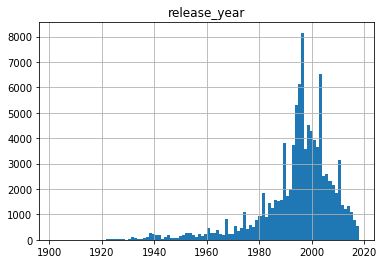

In [124]:
# Movies with highest number of ratings
#import dask.dataframe as dd
#movie_ratings = dd.from_pandas(movie_ratings, npartitions=1000)

most_rated = movie_ratings.groupby('release_year').Action.sum()
most_rated

plt.figure(figsize=(12,6))


movie_ratings.hist('release_year',bins=100)
plt.title('release_year')
plt.show()

In [236]:
# Extract Movie stats

movie_stats = movie_ratings.groupby('movieId').agg([np.size, np.mean])['rating']
movie_stats[cols] = movie_ratings.groupby('movieId').mean()[cols]
movie_stats.head()

,size,mean,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
movieId,,,,,,,,,,,,,,,,,,,,,
1,215.0,3.920930,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
2,110.0,3.431818,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
3,52.0,3.259615,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995.0
4,7.0,2.357143,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995.0
5,49.0,3.071429,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995.0


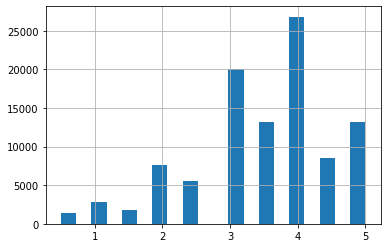

In [51]:
# Plot movie ratings by user
movie_ratings['rating'].hist(bins=20)

In [65]:
# Now have a look at the IMDB datset
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [164]:
# Join IMDB and MovieLens data to compare ratings

link_imdb_1 = imdb_ratings.merge(links,'inner',on='imdbId')
link_imdb = link_imdb_1.merge(movie_stats,'inner',on='movieId')
link_imdb['ml_rating'] = np.round(link_imdb['mean']*2,1)
link_imdb.head(15)

,tconst,averageRating,numVotes,imdbId,movieId,tmdbId,size,mean,(no genres listed),Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ml_rating
0,tt0000417,8.2,41371,417,32898,775.0,5.0,3.500000,0,1,...,0,0,0,0,0,1,0,0,0,7.0
1,tt0000439,7.3,16221,439,49389,5698.0,2.0,2.500000,0,0,...,0,0,0,0,0,0,0,0,1,5.0
2,tt0000516,6.6,808,516,140541,143634.0,1.0,4.000000,0,0,...,0,0,0,0,0,1,0,0,0,8.0
3,tt0004972,6.4,21398,4972,7065,618.0,1.0,2.000000,0,0,...,0,0,0,0,0,0,0,1,0,4.0
4,tt0006333,6.2,1470,6333,62383,30266.0,2.0,3.750000,0,1,...,0,0,0,0,0,1,0,0,0,7.5
5,tt0006864,7.8,13443,6864,7243,3059.0,1.0,3.500000,0,0,...,0,0,0,0,0,0,0,0,0,7.0
6,tt0007264,7.1,3079,7264,102747,2077.0,1.0,3.500000,0,0,...,0,0,0,0,0,0,0,0,0,7.0
7,tt0007361,6.2,343,7361,72921,174598.0,1.0,3.500000,0,0,...,0,0,0,0,1,0,0,0,0,7.0
8,tt0008133,7.7,7001,8133,8511,47653.0,1.0,4.500000,0,0,...,0,0,0,0,0,0,0,0,0,9.0
9,tt0010040,6.5,1294,10040,3132,70801.0,1.0,2.000000,0,0,...,0,0,0,0,0,0,0,0,0,4.0


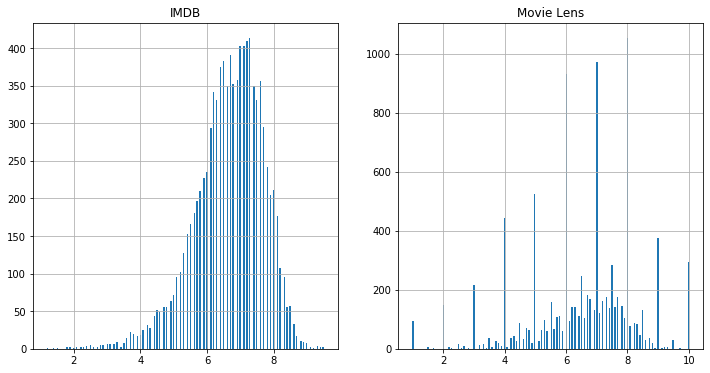

In [108]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
link_imdb['averageRating'].hist(bins=200)
plt.title('IMDB')
plt.subplot(1,2,2)
link_imdb['ml_rating'].hist(bins=200)
plt.title('Movie Lens')
plt.show()

Text(0.5, 1.0, 'Movie Lens')

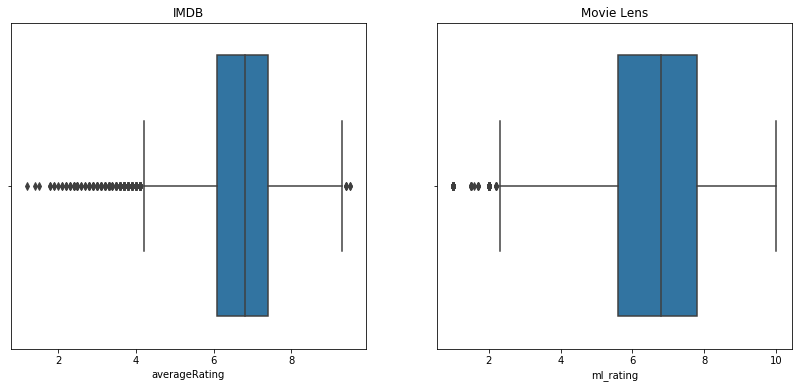

In [114]:
fig = plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=link_imdb,x='averageRating')
plt.title('IMDB')
plt.subplot(1,2,2)
sns.boxplot(data=link_imdb,x='ml_rating')
plt.title('Movie Lens')


Text(0.5, 1.0, 'Movie Lens')

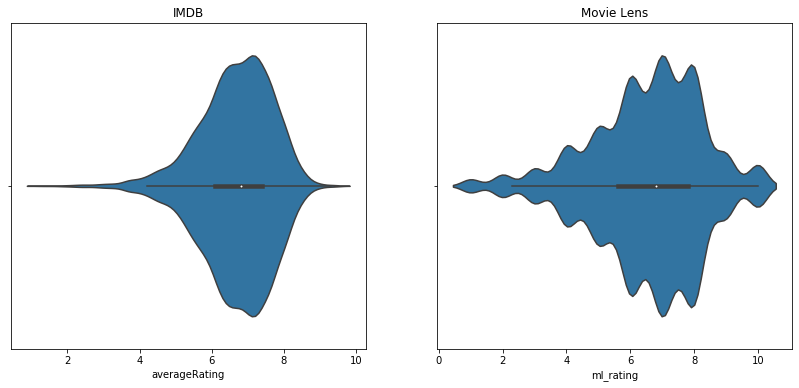

In [116]:

fig = plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.violinplot(x='averageRating',data=link_imdb)
plt.title('IMDB')
plt.subplot(1,2,2)
sns.violinplot(x='ml_rating',data=link_imdb)
plt.title('Movie Lens')


Text(0.5, 1.0, 'Movie Lens')

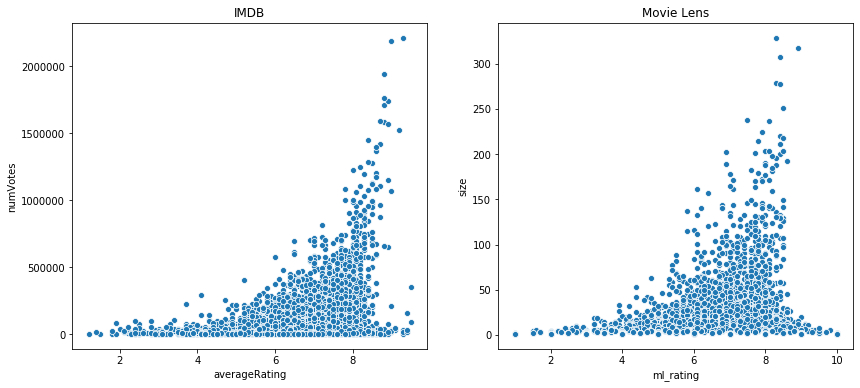

In [117]:

fig = plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x='averageRating',y='numVotes',data=link_imdb)
plt.title('IMDB')
plt.subplot(1,2,2)
sns.scatterplot(x='ml_rating',y='size',data=link_imdb)
plt.title('Movie Lens')

The above figure shows that high rated movies tend to have more ratings. Furthermore, all ratings for movielens above 8.5 have very few ratings.

Text(16.299999999999997, 0.5, 'MovieLens')

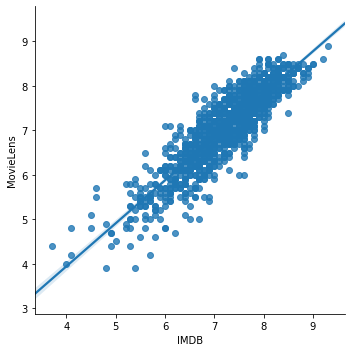

In [121]:
#Plot the LM Plot for both ratings but only for the movies with more than 20 movielens ratings

sns.lmplot(x='averageRating',y='ml_rating',data=link_imdb[link_imdb['size']>20])
plt.xlabel('IMDB')
plt.ylabel('MovieLens')

Rating stats for each genre

In [337]:
genre_rating = []
for i,genre in enumerate(cols):
    num_ratings = link_imdb[movie_ratings[genre]==1][genre].sum()
    imdb_rating = link_imdb[movie_ratings[genre]==1]['averageRating'].mean()
    ml_rating = link_imdb[movie_ratings[genre]==1]['ml_rating'].mean()
    genre_rating.append((genre,num_ratings,imdb_rating,ml_rating))

genre_rating = pd.DataFrame(genre_rating,columns=['genre','movies','imdb_rating','ml_rating']).sort_values('imdb_rating')
genre_rating['order'] = range(0,len(genre_rating))
genre_rating.head(20)

C:\Users\saleh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saleh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\saleh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,genre,movies,imdb_rating,ml_rating,order
10,Film-Noir,0,6.549000,6.485000,0
9,Fantasy,85,6.646570,6.440433,1
2,Adventure,303,6.649246,6.493355,2
8,Drama,1813,6.649738,6.488564,3
15,Sci-Fi,186,6.655332,6.529917,4
11,Horror,53,6.657904,6.521847,5
5,Comedy,1442,6.661660,6.531129,6
7,Documentary,4,6.661842,6.542105,7
16,Thriller,532,6.662693,6.510875,8
4,Children,62,6.665918,6.459961,9


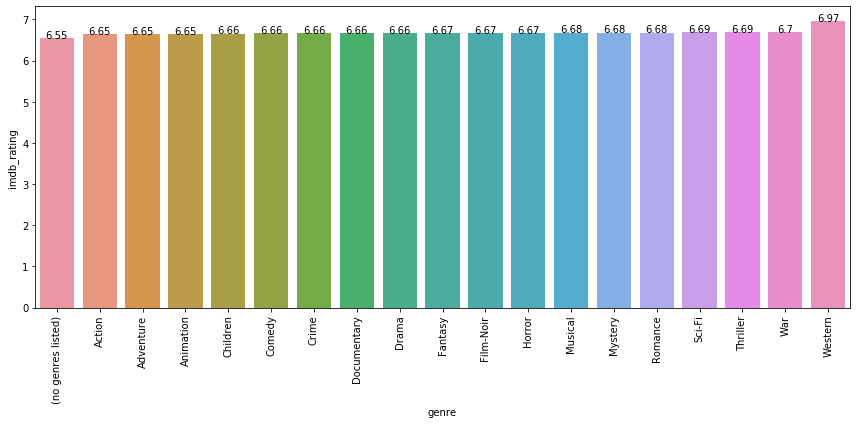

In [338]:
fig = plt.figure(figsize=(12,6)) # Create matplotlib figure

genre_rating = genre_rating.sort_values('imdb_rating')

bar = sns.barplot(x='genre', y="imdb_rating", data=genre_rating, order=genre_rating['genre'])
bar.set_xticklabels(cols,rotation=90)

for index, row in genre_rating.iterrows():
    bar.text(row.order,row.imdb_rating, round(row.imdb_rating,2), color='black', ha="center")


plt.tight_layout()
plt.show()

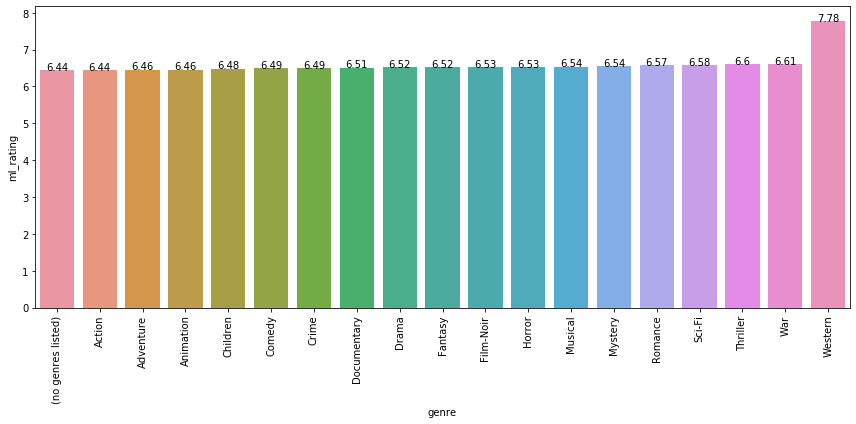

In [339]:
genre_rating = genre_rating.sort_values('ml_rating')
genre_rating['order'] = range(0,len(genre_rating))

fig = plt.figure(figsize=(12,6)) # Create matplotlib figure


bar = sns.barplot(x='genre', y="ml_rating", data=genre_rating, order=genre_rating['genre'])
bar.set_xticklabels(cols,rotation=90)

for index, row in genre_rating.iterrows():
    bar.text(row.order,row.ml_rating, round(row.ml_rating,2), color='black', ha="center")
    

plt.tight_layout()
plt.show()

In [305]:
# Working with tags
tags = pd.read_csv('C:/Users/saleh/Desktop/SM/Data/1M/ml-latest-small/tags.csv')

all_tags = tags.groupby('movieId')['tag'].apply(lambda x: x.tolist())
all_tags.head()

movieId
1                                  [pixar, pixar, fun]
2    [fantasy, magic board game, Robin Williams, game]
3                                         [moldy, old]
5                                  [pregnancy, remake]
7                                             [remake]
Name: tag, dtype: object

In [307]:
df = movies.merge(all_tags.to_frame(), left_index=True, right_index=True, how='left')
df.head()

,movieId,title,genres,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,"[pixar, pixar, fun]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,"[fantasy, magic board game, Robin Williams, game]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,"[moldy, old]"
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
